### TUGAS BESAR IF2220 PROBABILITAS DAN STATISTIKA

### PENARIKAN KESIMPULAN DAN PENGUJIAN HIPOTESIS


### KEVIN RONI 13520114

### YOSEPH ALEXANDER SIREGAR 13520141

In [2]:
#IMPORT MODULE & LOAD CSV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scst
import math

df = pd.read_csv('water_potability.csv', header=None)
df.columns = ["iD", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df

,iD,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


#### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [3]:
df1 = df.drop(columns=["iD", "Potability"])
stats = pd.DataFrame()
stats["Mean"] = df1.mean()
stats["Median"] = df1.median()
stats["Modus"] = df1.mode().loc[0].values
stats["Standard Deviation"] = df1.std()
stats["Variance"] = df1.var()
stats["Range"] = df1.max() - df1.min()
stats["Min"] = df1.min()
stats["Max"] = df1.max()
stats["Q1"] = df1.quantile(0.25)
stats["Q3"] = df1.quantile(0.75)
stats["IQR"] = stats["Q3"] - stats["Q1"]
stats["Skewness"] = df1.skew()
stats["Kurtosis"] = df1.kurt()
stats

,Mean,Median,Modus,Standard Deviation,Variance,Range,Min,Max,Q1,Q3,IQR,Skewness,Kurtosis
pH,7.087193,7.029490,0.227499,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,8.053006,1.962221,0.048535,0.626904
Hardness,195.969209,197.203525,73.492234,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,216.447589,39.706932,-0.085321,0.525480
Solids,21904.673439,20926.882155,320.942611,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,27170.534649,11556.121687,0.591011,0.337320
Chloramines,7.134322,7.142014,1.390871,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,8.109933,1.971607,0.013003,0.549782
Sulfate,333.211376,332.214113,129.000000,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,359.268147,51.641161,-0.045728,0.786854
Conductivity,426.476708,423.438372,201.619737,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,482.209772,115.590553,0.268012,-0.237206
OrganicCarbon,14.357940,14.323286,2.200000,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,16.683562,4.561031,-0.020220,0.031018
Trihalomethanes,66.400717,66.482041,8.577013,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,77.294613,21.344620,-0.051383,0.223017
Turbidity,3.969497,3.967374,1.450000,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,4.514663,1.071781,-0.032266,-0.049831


## 2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

### a. Kolom PH

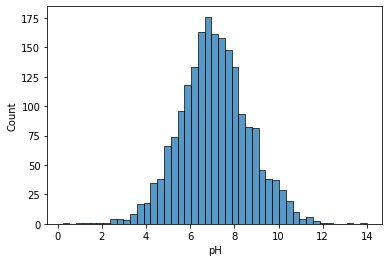

In [4]:
sns.histplot(data = df["pH"])
plt.show()

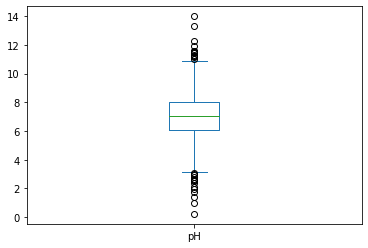

In [5]:
df["pH"].plot(kind="box")
plt.show()

Dapat dilihat berdasarkan grafik, kolom pH memiliki mean, median dan modus yang terpusat di sekitar nilai 7. \
Hal ini menunjukkan nilai pH yang terdapat pada dataset akan tersebar di nilai 7. \


### b. Kolom Hardness

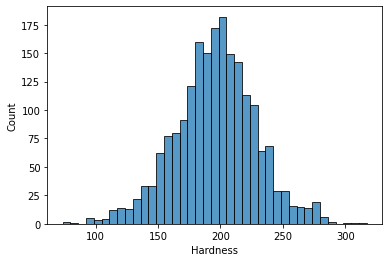

In [6]:
sns.histplot(data = df["Hardness"])
plt.show()

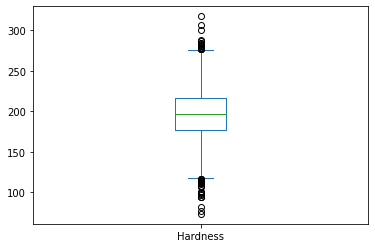

In [7]:
df["Hardness"].plot(kind="box")
plt.show()

### c. Kolom Solids

<AxesSubplot:xlabel='Solids', ylabel='Count'>

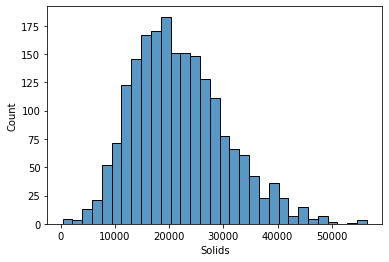

In [8]:
sns.histplot(data = df["Solids"])

<AxesSubplot:>

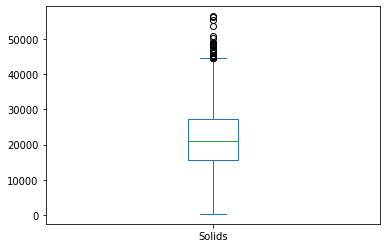

In [9]:
df["Solids"].plot(kind="box")

### d. Kolom Chloramines

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

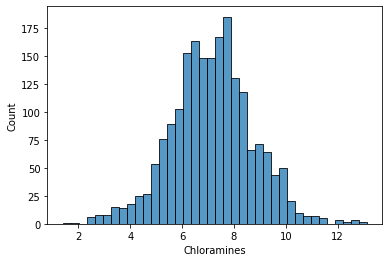

In [10]:
sns.histplot(data = df["Chloramines"])

<AxesSubplot:>

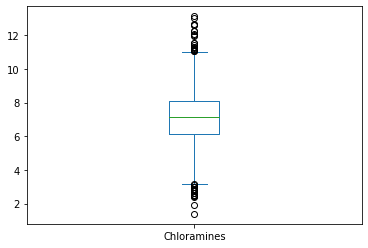

In [11]:
df["Chloramines"].plot(kind="box")

### e. Kolom Sulfate

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

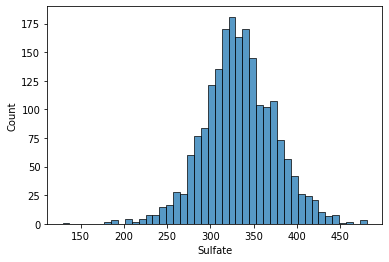

In [12]:
sns.histplot(data = df["Sulfate"])

<AxesSubplot:>

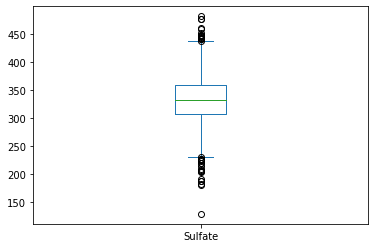

In [13]:
df["Sulfate"].plot(kind="box")

### f. Kolom Conductivity

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

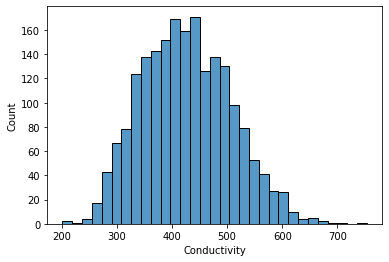

In [14]:
sns.histplot(data = df["Conductivity"])

<AxesSubplot:>

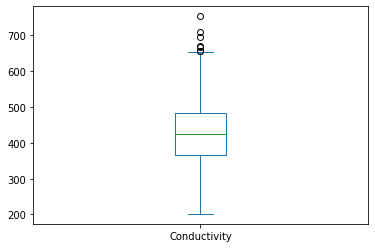

In [15]:
df["Conductivity"].plot(kind="box")

### g. Kolom OrganicCarbon

<AxesSubplot:xlabel='OrganicCarbon', ylabel='Count'>

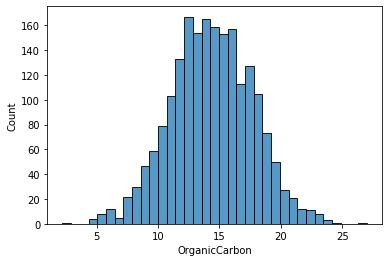

In [16]:
sns.histplot(data = df["OrganicCarbon"])

<AxesSubplot:>

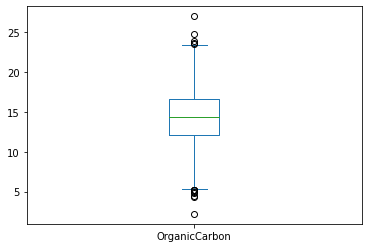

In [17]:
df["OrganicCarbon"].plot(kind="box")

### h. Kolom Trihalomethanes

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

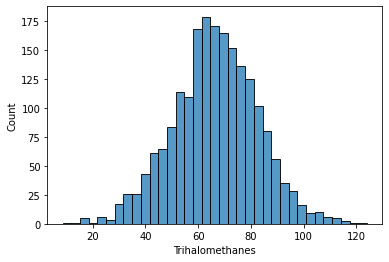

In [18]:
sns.histplot(data = df["Trihalomethanes"])

<AxesSubplot:>

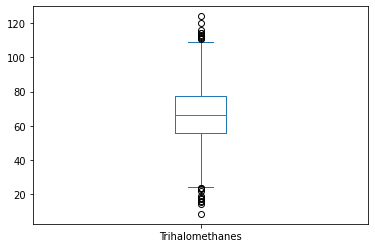

In [19]:
df["Trihalomethanes"].plot(kind="box")

### i. Kolom Turbidity

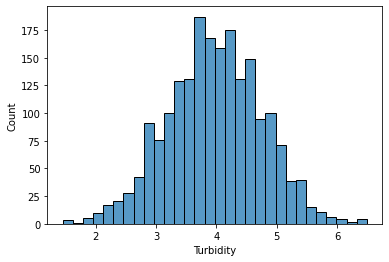

In [20]:
sns.histplot(data = df["Turbidity"])
plt.show()

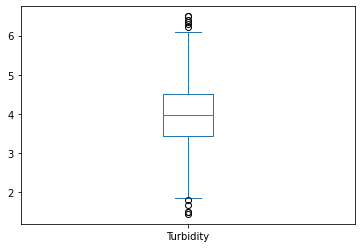

In [21]:
df["Turbidity"].plot(kind="box")
plt.show()

## 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [22]:
def normality_test(column):
    stat, p_value = scst.normaltest(df[column])
    print("p-value       = ", p_value)
    if(p_value < 0.05):
        print("Kolom %s tidak berdistribusi normal" %(column))
    else:
        print("Kolom %s berdistribusi normal" %(column))
    sns.distplot(df[column])
    plt.show()

p-value       =  2.6514813346797777e-05
Kolom pH tidak berdistribusi normal


C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


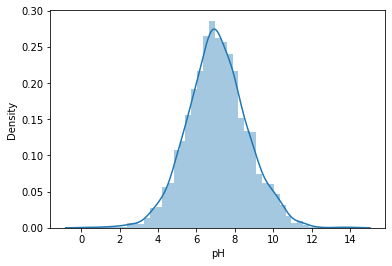

p-value       =  0.00013442428699593753
Kolom Hardness tidak berdistribusi normal


C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


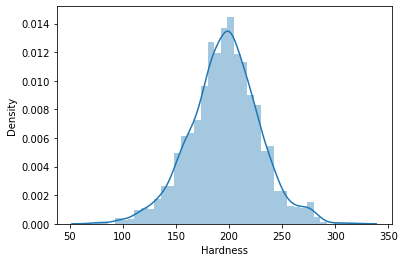

p-value       =  2.0796613688739523e-24
Kolom Solids tidak berdistribusi normal


C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


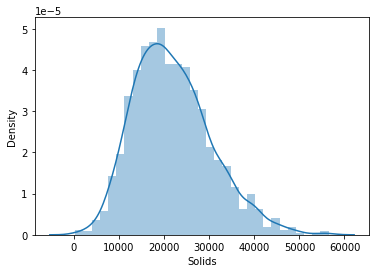

C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value       =  0.0002504831654753917
Kolom Chloramines tidak berdistribusi normal


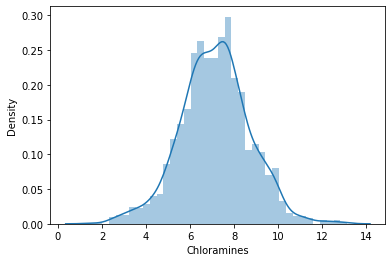

C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value       =  4.4255936678013136e-07
Kolom Sulfate tidak berdistribusi normal


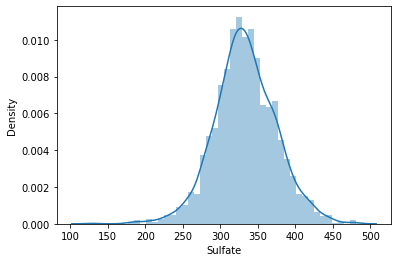

C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value       =  4.39018078287845e-07
Kolom Conductivity tidak berdistribusi normal


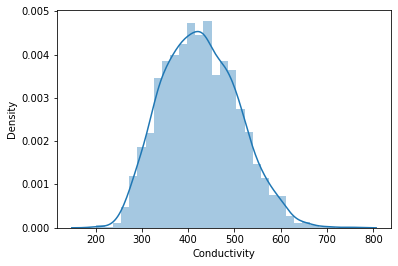

C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value       =  0.8825496581408284
Kolom OrganicCarbon berdistribusi normal


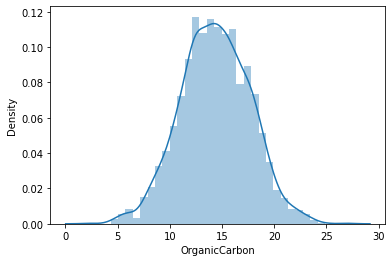

C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value       =  0.1043598441875204
Kolom Trihalomethanes berdistribusi normal


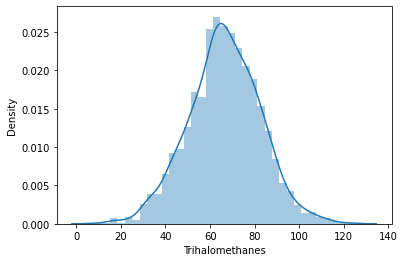

C:\Users\Yoseph Alexander\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value       =  0.7694717369961169
Kolom Turbidity berdistribusi normal


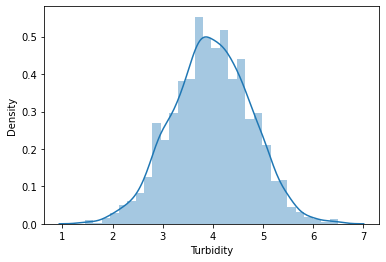

In [23]:
normality_test("pH")
normality_test("Hardness")
normality_test("Solids")
normality_test("Chloramines")
normality_test("Sulfate")
normality_test("Conductivity")
normality_test("OrganicCarbon")
normality_test("Trihalomethanes")
normality_test("Turbidity")

## 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

Akan dilakukan 6 langkah testing, yaitu sebagai berikut:
1. Tentukan Hipotesis nol (H0
: θ = θ0
), dimana θ bisa berupa μ, σ
2
, p, atau data lain berdistribusi

tertentu (normal, binomial, dsc.).

2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0
, θ < θ0
, atau θ ≠ θ0
.

3. Tentukan tingkat signifikan α.

4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. Titik kritis didapat berdasarkan $z_{\alpha}$ atau $z_\frac{\alpha}{2}$. Tergantung pada hipotesis yang dipilih, titik kritis akan berbeda.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang
digunakan.
6. Ambil keputusan dengan TOLAK H0
jika nilai uji terletak di daerah kritis atau dengan tes
signifikan, TOLAK H0
jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [24]:
def uji_statistik(data, H0, opt, alpha, Z):
    result = scst.ttest_1samp(data, H0, alternative=opt)
    print("Tes statistik         :", result.statistic)
    print("p-value               :", result.pvalue)
    if (result.statistic > Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")
    if (result.pvalue < alpha):
        print("H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan", alpha)
    else:
        print("H0 diterima karena p-value lebih besar dari tingkat signifikasi yang diinginkan", alpha)

def uji_statistik_2(data, H0, opt, alpha, Z):
    result = scst.ttest_1samp(data, H0, alternative=opt)
    print("Tes statistik         :", result.statistic)
    print("p-value               :", result.pvalue)
    if (result.statistic > Z or result.statistic < -1*Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")
    if (result.pvalue < alpha):
        print("H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan", alpha)
    else:
        print("H0 diterima karena p-value lebih besar dari tingkat signifikasi yang diinginkan", alpha)

def uji_statistik_proporsi(p,p0,n,Z):
    result = (p-p0)/math.sqrt(p0*(1-p0)/n)
    print("Tes statistik         :", result)
    print("p-value               :", 2*count_pValue(result))
    if (result > Z or result < -1*Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")

def uji_statistik_proporsi2(p,p0,n,Z):
    result = (p-p0)/math.sqrt(p0*(1-p0)/n)
    print("Tes statistik         :", result)
    print("p-value               :", count_pValue(result))
    if (result < -1*Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")

def count_pValue(Z):
    return (1 - scst.norm.cdf(abs(Z)))


a. Nilai Rata-rata pH di atas 7?

H0                    : μ = 7
H1                    : μ > 7
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.645
Tes statistik         : 2.485445147379887
p-value               : 0.006509872359240925
H0 ditolak karena terletak di daerah kritis
H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan 0.05


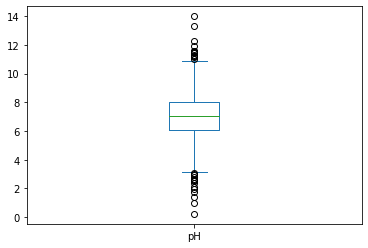

In [25]:
print("H0                    : μ = 7")
print("H1                    : μ > 7")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.645
print("Daerah kritis         : Z >", Z)
uji_statistik(df["pH"], 7, "greater", alpha, Z)
df["pH"].plot(kind="box")
plt.show()

Kesimpulannya, H0 akan ditolak dan menerima H1. Maka dapat dikatakan nilai rata-rata pH di atas 7.

b. Nilai Rata-rata Hardness tidak sama dengan 205?

H0                    : μ = 205
H1                    : μ != 205
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.96 or Z < -1.96
Tes statistik         : -12.403137170010732
p-value               : 4.299181043195823e-34
H0 ditolak karena terletak di daerah kritis
H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan 0.05


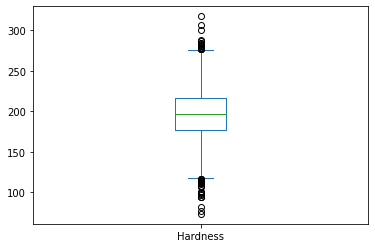

In [26]:
print("H0                    : μ = 205")
print("H1                    : μ != 205")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z > " +str(Z)+ " or Z < -" +str(Z))
uji_statistik_2(df["Hardness"], 205, "two-sided", alpha, Z)
df["Hardness"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan ditolak dan menerima H1. Maka dapat dikatakan nilai rata-rata Hardness tidak sama dengan 205.

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

H0                    : μ = 21900
H1                    : μ != 21900
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.96 or Z < -1.96
Tes statistik         : 0.5636797715721551
p-value               : 0.5742467134052605
H0 diterima karena terletak di luar daerah kritis
H0 diterima karena p-value lebih besar dari tingkat signifikasi yang diinginkan 0.05


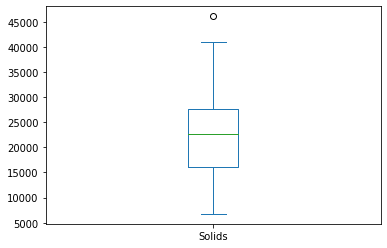

In [27]:
print("H0                    : μ = 21900")
print("H1                    : μ != 21900")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z > " +str(Z)+ " or Z < -" +str(Z))
df_100 = df.head(100)
uji_statistik_2(df_100["Solids"], 21900, "two-sided", alpha, Z)
df_100["Solids"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan diterima. Maka tidak dapat dikatakan bahwa nilai rata-rata 100 baris pertama kolom Solids bukan 21900.

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan
10%?

H0                    : P0 = 0.1
H1                    : P1 != 0.1
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.96 or Z < -1.96
Tes statistik         : 40.44637613158932
p-value               : 0.0
H0 ditolak karena terletak di daerah kritis


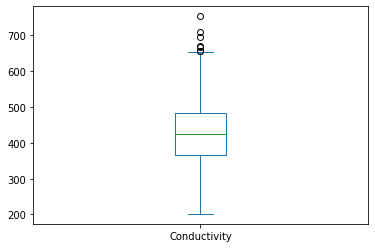

In [28]:
sample = []
for row in df["Conductivity"]:
    if (row > 450):
        sample.append(row)

print("H0                    : P0 = 0.1")
print("H1                    : P1 != 0.1")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z > " +str(Z)+ " or Z < -" +str(Z))
uji_statistik_proporsi(len(sample)/len(df), 0.1, len(df), Z)
df["Conductivity"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan ditolak dan menerima H1. Maka dapat dikatakan proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%.

e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

106
H0                    : P0 = 0.05
H1                    : P1 < 0.05
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z < -1.96
Tes statistik         : 0.5628826416670951
p-value               : 0.2867574004907629
H0 diterima karena terletak di luar daerah kritis


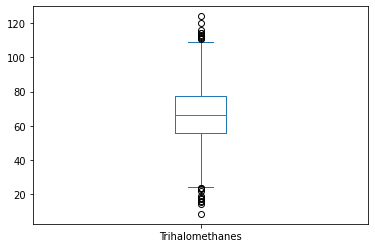

In [29]:
sample2 = []
for row in df["Trihalomethanes"]:
    if (row < 40):
        sample2.append(row)
print(len(sample2))
print("H0                    : P0 = 0.05")
print("H1                    : P1 < 0.05")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z < -" +str(Z))  
uji_statistik_proporsi2(len(sample2)/len(df), 0.05, len(df), Z)
df["Trihalomethanes"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan diterima. Maka tidak dapat dikatakan nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%

## 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

Enam Langkah Testing:
1. Tentukan Hipotesis nol ($H_0$: θ = $θ_0$), dimana θ bisa berupa μ, $σ^{2}$, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > $θ_0$, θ < $θ_0$, atau θ ≠ $θ_0$.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.


### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?


1. Tentukan Hipotesis nol $H_0$ : $\mu_1$ - $\mu_2$ = 0
2. Pilih Hipotesis Alternatif $H_{1}$ : $\mu_1$ - $\mu_2$ $\neq$ 0
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji rata-rata dua populasi $\mu_1$ - $\mu_2$ = $d_0$ dengan standar deviasi diketahui (dapat dicari), 
z = $\frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $ dengan $d_0$ = 0 \
Daerah Kritis : \
$z < -z_\frac{\alpha}{2}$ atau $z > z_\frac{\alpha}{2}$ dengan $z_\frac{\alpha}{2}$ = 1.96 karena P(Z < z) = 1 - ($\frac{0.05}{2}$) = 0.975 \
$z < -1.96$ atau $z > 1.96$
5. Hitung nilai uji statistik dari data sample.

z =  -2.0735632660592493
pval =  0.03811988973939884


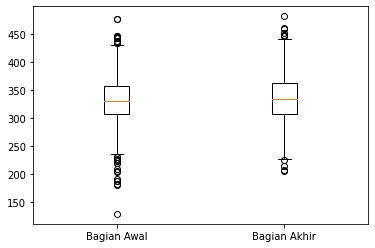

In [30]:
# z value
xbar1 = df.loc[:1004].Sulfate.mean()
xbar2 = df.loc[1005:].Sulfate.mean()
std = df.Sulfate.std()
n = 1005
print("z = ", (xbar1 - xbar2)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))
print("pval = ",(1 - scst.norm.cdf(abs((xbar1 - xbar2)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))))*2)

# box plot
plt.boxplot([df.loc[:1004].Sulfate, df.loc[1005:].Sulfate])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

6. Ambil keputusan : Tolak nilai $H_0$ karena nilai Z berada pada daerah kritis dan terima $H_1$, maka dapat diambil kesimpulan bahwa rata-rata kedua bagian tidaklah sama dan diperkuat dengan tes signifikansi dimana nilai p-value lebih kecil dari tingkat signifikan yang dipilih.

### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

1. Tentukan Hipotesis nol $H_0$ : $\mu_1$ - $\mu_2$ = 0.15
2. Pilih Hipotesis Alternatif $H_{1}$ : $\mu_1$ - $\mu_2$ $\neq$ 0.15
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji rata-rata dua populasi $\mu_1$ - $\mu_2$ = $d_0$ dengan standar deviasi diketahui (dapat dicari), 
z = $\frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $ dengan $d_0$ = 0.15 \
Daerah Kritis : \
$z < -z_\frac{\alpha}{2}$ atau $z > z_\frac{\alpha}{2}$ dengan $z_\frac{\alpha}{2}$ = 1.96 karena P(Z < z) = 1 - ($\frac{0.05}{2}$) = 0.975 \
$z < -1.96$ atau $z > 1.96$
5. Hitung nilai uji statistik dari data sample.

z =  -2.412566026857564
pval =  0.015840668015256965


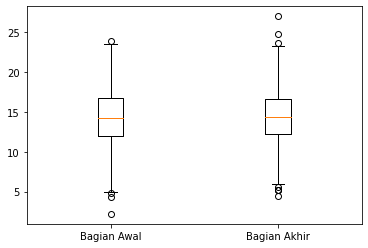

In [31]:
# z value
xbar1 = df.loc[:1004].OrganicCarbon.mean()
xbar2 = df.loc[1005:].OrganicCarbon.mean()
std = df.OrganicCarbon.std()
n = 1005
print("z = ",(xbar1 - xbar2 - 0.15)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))
print("pval = ",(1 - scst.norm.cdf(abs((xbar1 - xbar2 - 0.15)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))))*2)

# box plot
plt.boxplot([df.loc[:1004].OrganicCarbon, df.loc[1005:].OrganicCarbon])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

6. Ambil keputusan : Tolak nilai $H_0$ karena nilai Z berada pada daerah kritis dan terima $H_1$, maka dapat diambil kesimpulan bahwa rata-rata bagian awal kolom OrganicCarbon tidak lebih besar dari pada bagian akhirnya sebesar 0.15 dan diperkuat dengan tes signifikansi dimana nilai p-value lebih kecil dari tingkat signifikan yang dipilih.

### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

1. Tentukan Hipotesis nol $H_0$ : $\mu_1$ - $\mu_2$ = 0
2. Pilih Hipotesis Alternatif $H_{1}$ : $\mu_1$ - $\mu_2$ $\neq$ 0
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji rata-rata dua populasi $\mu_1$ - $\mu_2$ = $d_0$ dengan standar deviasi diketahui (dapat dicari), 
z = $\frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $ dengan $d_0$ = 0 \
Daerah Kritis : \
$z < -z_\frac{\alpha}{2}$ atau $z > z_\frac{\alpha}{2}$ dengan $z_\frac{\alpha}{2}$ = 1.96 karena P(Z < z) = 1 - ($\frac{0.05}{2}$) = 0.975 \
$z < -1.96$ atau $z > 1.96$
5. Hitung nilai uji statistik dari data sample.

z =  -0.6219312633138907
pval =  0.5339870668355124


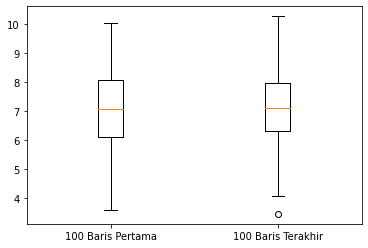

In [32]:
# z value
xbar1 = df.loc[:99].Chloramines.mean()
xbar2 = df.loc[1910:].Chloramines.mean()
std = df.Chloramines.std()
n = 100
print("z = ",(xbar1 - xbar2)/(np.sqrt((std**2/n)+(std**2/n))))
print("pval = ",(1 - scst.norm.cdf(abs((xbar1 - xbar2)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))))*2)

# box plot
plt.boxplot([df.loc[:99].Chloramines, df.loc[1910:].Chloramines])
plt.xticks([1, 2], ["100 Baris Pertama", "100 Baris Terakhir"])
plt.show()

6. Ambil keputusan : Terima nilai $H_0$ karena nilai Z berada di luar daerah kritis dan tolak $H_1$, maka dapat diambil kesimpulan bahwa rata-rata 100 baris pertama dan 100 baris terakhir kolom Chloramines sama dan diperkuat dengan tes signifikansi dimana nilai p-value lebih besar dari tingkat signifikan yang dipilih.

### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

1. Tentukan Hipotesis nol $H_0$ : $p_1$ - $p_2$ = 0
2. Pilih Hipotesis Alternatif $H_{1}$ : $p_1$ - $p_2$ > 0
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji proporsi dengan distribusi normal, 
z = $ \frac{(\hat{p_1} - \hat{p_2})}{\sqrt{\bar{p}\bar{q}(1/n_1 + 1/n_2)}} $ \
Daerah Kritis : \
$z > z_{\alpha}$ dengan $z_{\alpha}$ = 1.645 karena P(Z < z) = 1 - 0.05 = 0.95 \
$z > 1.645$
5. Hitung nilai uji statistik dari data sample.

z =  -3.0465394878578107


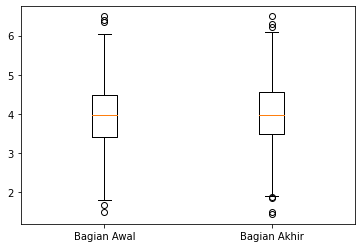

In [33]:
# z value
n1 = n2 = 1005
pHat1 = len(df.head(1005)[df.head(1005)["Turbidity"] > 4]) / 1005
pHat2 = len(df.tail(1005)[df.tail(1005)["Turbidity"] > 4]) / 1005
pBar = (pHat1 + pHat2) / 2010
# qbar = 1-pBar
print("z = ",(pHat1 - pHat2)/(np.sqrt(pBar*(1-pBar)*((1/n1)+(1/n2)))))

# box plot
plt.boxplot([df.loc[:1004].Turbidity, df.loc[1005:].Turbidity])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

6. Ambil keputusan : Terima nilai $H_0$ karena nilai Z berada di luar daerah kritis dan tolak $H_1$, maka dapat diambil kesimpulan bahwa proporsi nilai bagian awal Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di bagian akhir

### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

1. Tentukan Nilai Hipotesis nol $H_0$ : $\sigma_1^2$ = $\sigma_2^2$
2. Pilih Hipotesis Alternatif $H_1$ : $\sigma_1^2$ $\neq$ $\sigma_2^2$
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai \
Digunakan uji variansi dua populasi dengan distribusi f , f = $\dfrac{s_1^2}{s_2^2} $ \
Daerah kritis : \
$f < f_\frac{1 - \alpha}{2} (v_1, v_2)$ atau $f > f_\frac{\alpha}{2}(v_1, v_2)$ dengan $v_1 = n_1 -1$, $v_2 = n_2 -1$

Daerah kritis : f < 0.883572344355818 atau f > 1.1317692392568777


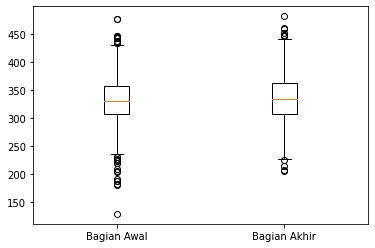

In [34]:
# z value
n = (len(df.Sulfate)/2) - 1
f1 = scst.f.ppf(0.025, n, n)
f2 = scst.f.ppf(0.975, n, n)
print("Daerah kritis : f <", f1, "atau f >", f2)

# box plot
plt.boxplot([df.loc[:1004].Sulfate, df.loc[1005:].Sulfate])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

5. Hitung nilai uji statistik dari data sample.

In [35]:
var1 = df.Sulfate.loc[:1004].var()
var2 = df.Sulfate.loc[1005:].var()
print("f = ", var1/var2)

f =  1.0152511043950063


6. Ambil keputusan : Terima nilai $H_0$ karena nilai f berada di luar daerah kritis dan tolak $H_1$, maka dapat diambil kesimpulan bahwa variansi bagian awal dan bagian akhir kolom Sulfate sama

## 6. Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Korelasi ditentukan dengan menggunakan pearson's correlation test dengan hipotesis
- Hipotesis Nol $H_0$: p=0 (Kedua kolom tidak berkorelasi)
- Hipotesis Alternatif $H_1$ : p≠0 (Kedua Kolom berkorelasi)

In [36]:
def corTest(col1, col2):
    sns.scatterplot(data=df, x=col1, y=col2)
    cor, pval = scst.pearsonr(df[col1], df[col2])
    if pval > 0.05 : # digunakan alpha = 0.05
        print("H₀ diterima (kedua kolom tidak berkorelasi)")
    else:
        print("H₀ ditolak (kedua kolom  berkorelasi)")
    print("Koefisien Korelasi = ", cor)
    print("pval = ", pval)

### Tes Korelasi Kolom non-Target pH dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.015475094408433502
pval =  0.48805529843977147


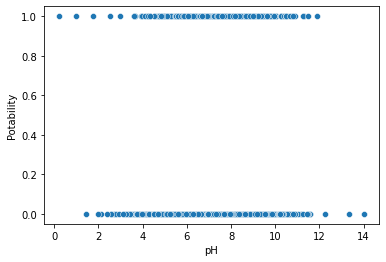

In [37]:
corTest("pH", "Potability")

### Tes Korelasi Kolom non-Target Hardness dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.0014631528959479423
pval =  0.9477306859719101


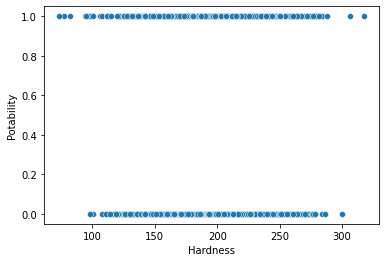

In [38]:
corTest("Hardness", "Potability")

### Tes Korelasi Kolom non-Target Solids dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.03897657818173474
pval =  0.08063479734364612


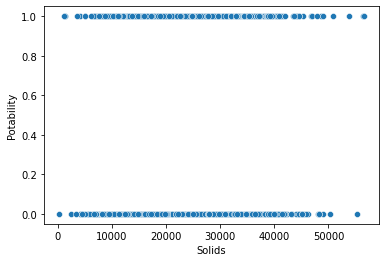

In [39]:
corTest("Solids", "Potability")

### Tes Korelasi Kolom non-Target Chloramines dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.02077892184052413
pval =  0.3518003359635207


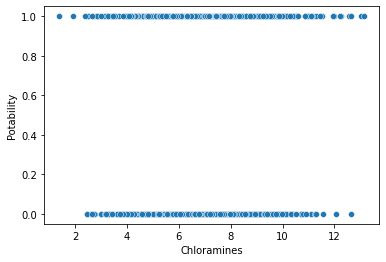

In [40]:
corTest("Chloramines", "Potability")

### Tes Korelasi Kolom non-Target Sulfate dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.015703164419273812
pval =  0.48166585681668234


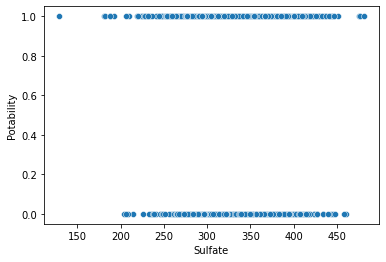

In [41]:
corTest("Sulfate", "Potability")

### Tes Korelasi Kolom non-Target Conductivity dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.016257120111377105
pval =  0.4663378059686175


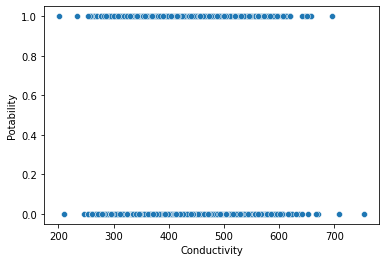

In [42]:
corTest("Conductivity", "Potability")

### Tes Korelasi Kolom non-Target OrganicCarbon dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.015488461910747308
pval =  0.4876795482205311


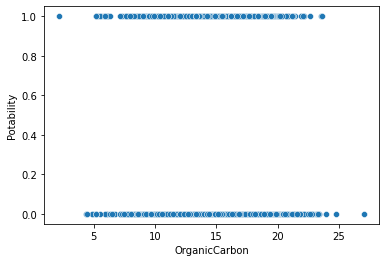

In [43]:
corTest("OrganicCarbon", "Potability")

### Tes Korelasi Kolom non-Target Trihalomethanes dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.009236711064713042
pval =  0.6789759745975009


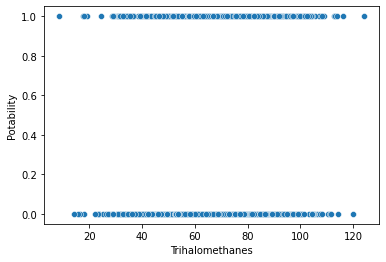

In [44]:
corTest("Trihalomethanes", "Potability")

### Tes Korelasi Kolom non-Target Turbidity dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.0223310426406227
pval =  0.316986307538362


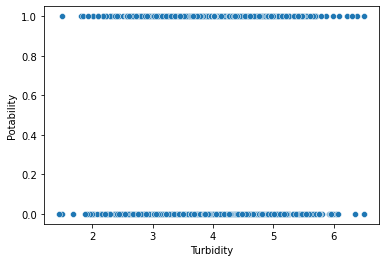

In [45]:
corTest("Turbidity", "Potability")